In [54]:
import os
import numpy as np
import pandas as pd

In [55]:
print(os.listdir("/Users/fangcheng/KNN算法/titanic"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [56]:
# 导入训练集数据并查看数据结构
train_df = pd.read_csv('/Users/fangcheng/KNN算法/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train_df.shape

(891, 12)

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
# 导入测试集数据并查看结构
test_df = pd.read_csv('/Users/fangcheng/KNN算法/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
test_df.shape

(418, 11)

In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
# 导入gender_submission.csv数据集并查看结构
gender_prediction_df = pd.read_csv('/Users/fangcheng/KNN算法/titanic/gender_submission.csv')
gender_prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [63]:
# 数据分析，导入画图模块
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

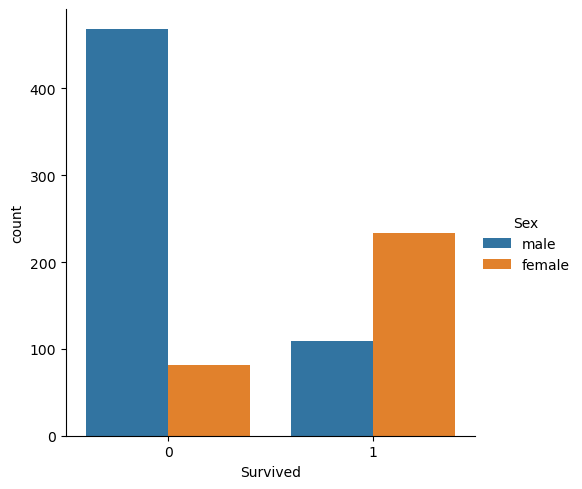

In [64]:
sns.catplot(data = train_df,kind="count",x="Survived",hue="Sex")

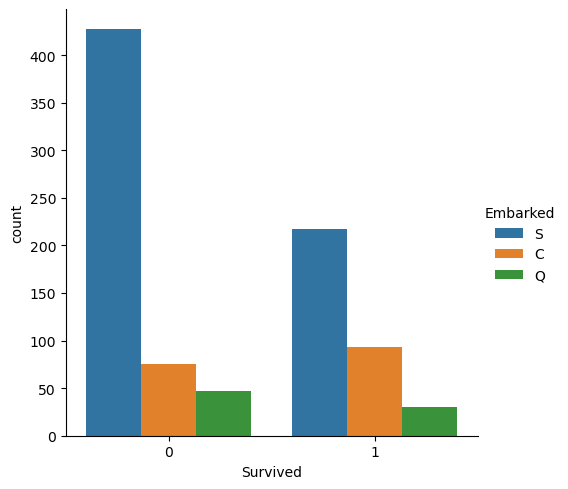

In [65]:
sns.catplot(data=train_df, kind="count", x="Survived", hue="Embarked")

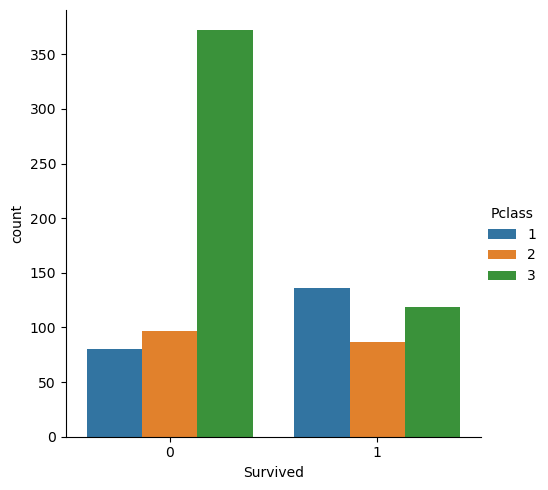

In [66]:
sns.catplot(data=train_df, kind="count", x="Survived", hue="Pclass")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

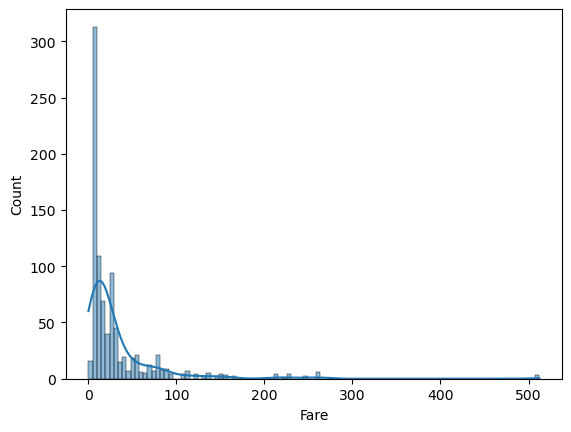

In [67]:
sns.histplot(data=train_df["Fare"],kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

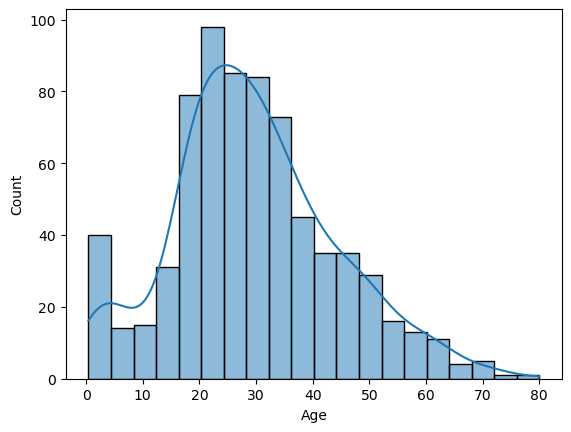

In [68]:
sns.histplot(data=train_df["Age"],kde=True)

<AxesSubplot:>

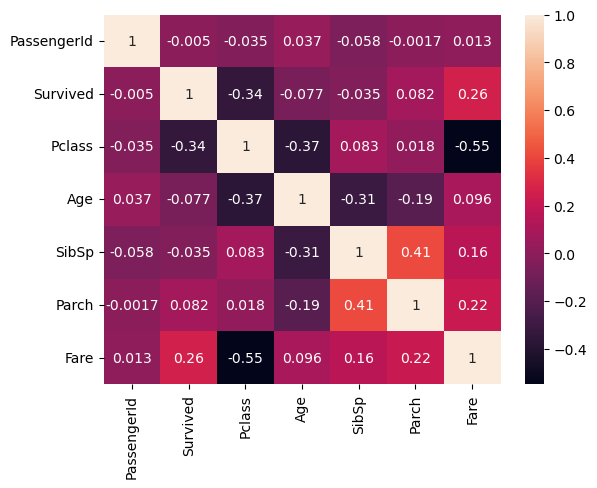

In [69]:
sns.heatmap(train_df.corr(),annot=True)

In [70]:
# 数据准备和功能工程
from sklearn.model_selection import train_test_split

In [71]:
def transform_sex(value):
    if value == "female":
        return 1
    else:
        return 0


In [72]:
train_df["Sex"] = train_df["Sex"].map(transform_sex)
test_df["Sex"] = test_df["Sex"].map(transform_sex)

In [73]:
train_df["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [74]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:
train_df["Age"] = train_df["Age"].fillna(value=train_df["Age"].median())
test_df["Age"] = test_df["Age"].fillna(value=test_df["Age"].median())
test_df["Fare"] = test_df["Fare"].fillna(value=test_df["Fare"].median())

In [77]:
features = ["Fare", "Sex", "Age", "Pclass", "Parch", "SibSp"]
X_train, X_test, y_train,y_test = train_test_split(train_df[features],
                                                  train_df["Survived"],
                                                  test_size=0.50,
                                                  random_state=0)

In [78]:
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((445, 6), (446, 6), (445,), (446,))

In [79]:
# 训练数据
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
model = GradientBoostingClassifier()

In [81]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [82]:
# 验证
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [83]:
model.score(X_test, y_test)

0.820627802690583

In [84]:
# 将创建的模型与性别模型进行比较
gender_predictions = (X_test["Sex"] == 1).astype(np.int64)
np.mean(y_test == gender_predictions)

0.7825112107623319

In [85]:
# 创建提交
from datetime import date

In [86]:
model_predictions = model.predict(test_df[features])

In [87]:
submission = pd.Series(model_predictions,index=test_df['PassengerId'], name='Survived')
submission.head()

PassengerId
892    0
893    0
894    0
895    0
896    1
Name: Survived, dtype: int64

In [88]:
# 保存文件
file_name = "submission.csv"
submission.to_csv(file_name,header=True)